In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import datetime as dt
import seaborn as sns

df = pd.read_csv('bollywood.csv')
df.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224


In [2]:
# Question 1

print('Number of records present in the data set:', len(df))

Number of records present in the data set: 149


In [3]:
# Question 2 

values = df['Genre'].str.strip().value_counts(ascending=True)
print(values)

values = df['Genre'].str.strip().value_counts(ascending=False)
print(values)

Action      24
Romance     25
Thriller    29
Drama       35
Comedy      36
Name: Genre, dtype: int64
Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: Genre, dtype: int64


In [4]:
# Question 3 

max = df['Genre'].str.strip().value_counts(ascending=False).nlargest(n=1)
print(max)

Comedy    36
Name: Genre, dtype: int64


In [5]:
# Question 4

crosstable = pd.crosstab(index = df['Genre'], columns = df['ReleaseTime'])
crosstable

ReleaseTime,FS,HS,LW,N
Genre,,,,
Drama,4,6,1,24
Action,3,3,3,12
Action,0,0,0,3
Comedy,3,5,5,23
Romance,3,3,4,15
Thriller,4,1,1,20
Thriller,0,0,1,2


In [6]:
# Question 5

df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Month'] = df['Release Date'].dt.month

max_months  = df['Month'].value_counts().nlargest(n=1)
print(max_months)
print("Maximum movies are in januray with a total of 20 movies")

1    20
Name: Month, dtype: int64
Maximum movies are in januray with a total of 20 movies


In [7]:
# Question 6

high_budget_releases  = df.loc[df['Budget'] > 25]['Month'].value_counts().nlargest(n=1)
print(high_budget_releases)
print("The Highest big budget movies are in february with 9 movies")

2    9
Name: Month, dtype: int64
The Highest big budget movies are in february with 9 movies


In [8]:
# Question 7

df['ROI'] = (df['BoxOfficeCollection'] - df['Budget']) / df['Budget']
print("Top 10 movies with the highest ROI are: ")
df_new = df.nlargest(n=10, columns=['ROI']).head(10)
df_new

Top 10 movies with the highest ROI are: 


,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Month,ROI
64,65,2013-04-26,Aashiqui 2,N,Romance,12,110.0,2926673,4944,628,4,8.166667
89,90,2014-12-19,PK,HS,Drama,85,735.0,13270623,43767,5693,12,7.647059
132,133,2013-09-13,Grand Masti,LW,Comedy,35,298.0,1795640,3015,721,9,7.514286
135,136,2013-09-20,The Lunchbox,N,Drama,10,85.0,1064854,4054,285,9,7.500000
87,88,2013-06-14,Fukrey,N,Comedy,5,36.2,227912,222,39,6,6.240000
58,59,2014-09-05,Mary Kom,N,Drama,15,104.0,6086811,26560,1647,9,5.933333
128,129,2013-10-18,Shahid,FS,Drama,6,40.0,1148516,3155,396,10,5.666667
37,38,2014-07-11,Humpty Sharma Ki Dulhania,N,Romance,20,130.0,6604595,14535,2208,7,5.500000
101,102,2013-07-12,Bhaag Milkha Bhaag,N,Drama,30,164.0,2635390,4622,456,7,4.466667
115,116,2013-08-09,Chennai Express,FS,Comedy,75,395.0,1882346,7954,1593,8,4.266667


In [9]:
# Question 8 

rt_roi_relation = df['ReleaseTime'].value_counts()
print(rt_roi_relation)

avg_roi_FS = df.loc[df['ReleaseTime'] == 'FS']['ROI'].mean()
print("avg roi of movies during festive season: ", avg_roi_FS)
avg_roi_LW = df.loc[df['ReleaseTime'] == 'LW']['ROI'].mean()
print("avg roi of movies during long weekend:  ", avg_roi_LW)
avg_roi_HS = df.loc[df['ReleaseTime'] == 'HS']['ROI'].mean()
print("avg roi of movies during Holiday season: ", avg_roi_HS)
avg_roi_N = df.loc[df['ReleaseTime'] == 'N']['ROI'].mean()
print("avg roi of movies during Normal days:  ", avg_roi_N)

N     99
HS    18
FS    17
LW    15
Name: ReleaseTime, dtype: int64
avg roi of movies during festive season:  0.9738532013595953
avg roi of movies during long weekend:   1.1272053098737973
avg roi of movies during Holiday season:  0.8508667840873724
avg roi of movies during Normal days:   0.6577216305350877


In [10]:
# Question 9 

print('the correlation between box office collection and youtube likes are', df['BoxOfficeCollection'].corr(df['YoutubeLikes']))

the correlation between box office collection and youtube likes are 0.6825165877731297


Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: Genre, dtype: int64


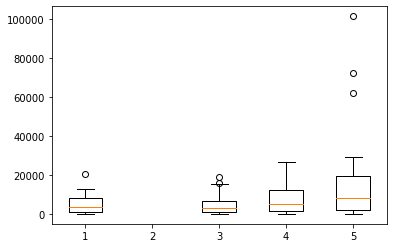

In [11]:
# Question 10 

values = df['Genre'].str.strip().value_counts(ascending=False)
print(values)

Comedy = df.loc[df['Genre'] == 'Comedy', 'YoutubeLikes']
Drama = df.loc[df['Genre'] == 'Drama', 'YoutubeLikes']
Thriller = df.loc[df['Genre'] == 'Thriller', 'YoutubeLikes']
Romance = df.loc[df['Genre'] == 'Romance', 'YoutubeLikes']
Action = df.loc[df['Genre'] == 'Action', 'YoutubeLikes']

movie_data = [Comedy, Drama, Thriller, Romance, Action]
plt.boxplot(movie_data)

plt.show()

<AxesSubplot:>

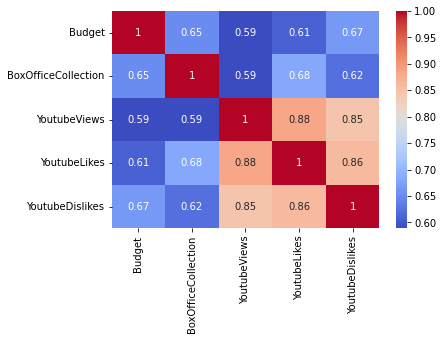

In [12]:
# Question 11

correlation = df[['Budget','BoxOfficeCollection','YoutubeViews','YoutubeLikes','YoutubeDislikes']].corr()
sns.heatmap(correlation , annot = True, fmt='.2g',cmap= 'coolwarm') 

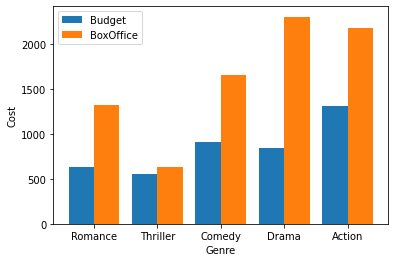

In [13]:
# Question 12

df['Year'] = df['Release Date'].dt.year
new_df = df[df.Year-2013 <= 2]
new_df.head()
X = ['Romance', 'Thriller', 'Comedy', 'Drama', 'Action']
Budget = [new_df.loc[new_df.Genre == 'Romance', 'Budget'].sum(), 
          new_df.loc[new_df.Genre == 'Thriller', 'Budget'].sum(),
          new_df.loc[new_df.Genre == 'Comedy', 'Budget'].sum(),
          new_df.loc[new_df.Genre == ' Drama ', 'Budget'].sum(),
          new_df.loc[new_df.Genre == 'Action', 'Budget'].sum()]
BoxOffice = [new_df.loc[new_df.Genre == 'Romance', 'BoxOfficeCollection'].sum(), 
             new_df.loc[new_df.Genre == 'Thriller', 'BoxOfficeCollection'].sum(),
             new_df.loc[new_df.Genre == 'Comedy', 'BoxOfficeCollection'].sum(),
             new_df.loc[new_df.Genre == ' Drama ', 'BoxOfficeCollection'].sum(),
             new_df.loc[new_df.Genre == 'Action', 'BoxOfficeCollection'].sum()]
X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, Budget, 0.4, label = 'Budget')
plt.bar(X_axis + 0.2, BoxOffice, 0.4, label = 'BoxOffice')

plt.xticks(X_axis, X)
plt.ylabel('Cost')
plt.xlabel("Genre")

plt.legend()
plt.show()

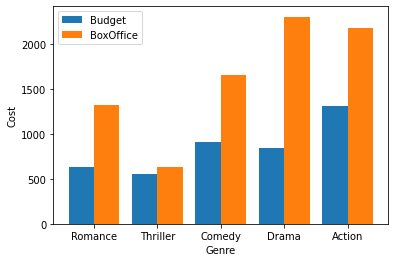

In [14]:
# Question 13

X = ['Romance', 'Thriller', 'Comedy', 'Drama', 'Action']
Budget = [df.loc[df.Genre == 'Romance', 'Budget'].sum(), 
          df.loc[df.Genre == 'Thriller', 'Budget'].sum(),
          df.loc[df.Genre == 'Comedy', 'Budget'].sum(),
          df.loc[df.Genre == ' Drama ', 'Budget'].sum(),
          df.loc[df.Genre == 'Action', 'Budget'].sum()]
BoxOffice = [df.loc[df.Genre == 'Romance', 'BoxOfficeCollection'].sum(), 
             df.loc[df.Genre == 'Thriller', 'BoxOfficeCollection'].sum(),
             df.loc[df.Genre == 'Comedy', 'BoxOfficeCollection'].sum(),
             df.loc[df.Genre == ' Drama ', 'BoxOfficeCollection'].sum(),
             df.loc[df.Genre == 'Action', 'BoxOfficeCollection'].sum()]
X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, Budget, 0.4, label = 'Budget')
plt.bar(X_axis + 0.2, BoxOffice, 0.4, label = 'BoxOffice')

plt.xticks(X_axis, X)
plt.ylabel('Cost')
plt.xlabel("Genre")

plt.legend()
plt.show()


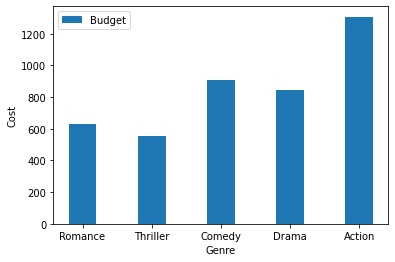

In [15]:
# Question 14

X = ['Romance', 'Thriller', 'Comedy', 'Drama', 'Action']
Budget = [df.loc[df.Genre == 'Romance', 'Budget'].sum(), 
          df.loc[df.Genre == 'Thriller', 'Budget'].sum(),
          df.loc[df.Genre == 'Comedy', 'Budget'].sum(),
          df.loc[df.Genre == ' Drama ', 'Budget'].sum(),
          df.loc[df.Genre == 'Action', 'Budget'].sum()]
BoxOffice = [df.loc[df.Genre == 'Romance', 'BoxOfficeCollection'].sum(), 
             df.loc[df.Genre == 'Thriller', 'BoxOfficeCollection'].sum(),
             df.loc[df.Genre == 'Comedy', 'BoxOfficeCollection'].sum(),
             df.loc[df.Genre == ' Drama ', 'BoxOfficeCollection'].sum(),
             df.loc[df.Genre == 'Action', 'BoxOfficeCollection'].sum()]
X_axis = np.arange(len(X))

plt.bar(X_axis, Budget, 0.4, label = 'Budget')

plt.xticks(X_axis, X)
plt.ylabel('Cost')
plt.xlabel("Genre")

plt.legend()
plt.show()


[67, 70, 70]


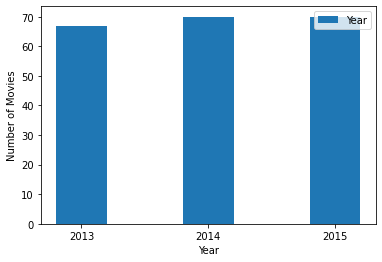

In [16]:
# Question 15

X = ['2013', '2014', '2015']
year_count = [df.loc[df.Year == 2013, 'Year'].count(), 
          df.loc[df.Year == 2014, 'Year'].count(),
          df.loc[df.Year == 2014, 'Year'].count()]
X_axis = np.arange(len(X))
print(year_count)

plt.bar(X_axis, year_count, 0.4, label = 'Year')

plt.xticks(X_axis, X)
plt.ylabel('Number of Movies')
plt.xlabel('Year')

plt.legend()
plt.show()